<div class="alert alert-block alert-warning">

# Wichtige Hinweise
**Bitte lesen Sie folgende Hinweise sorgfältig**

- Dies ist das Übungsblatt. Lösen Sie dieses erst, wenn Sie das Beispiels-Blatt (3a) gelesen und gelöst haben!
- Öffen Sie sowohl dieses Blatt wie auch das Beisipels-Blatt nebeneinander, damit Sie sich für die Aufgaben an den Beispielen orientieren können (falls Sie Hilfe benötigen, wenden Sie sich an Herrn Wendl).
- Lesen Sie den gesamten Text aufmerksam und vervollständigen Sie jeden Code-Block in dieser Datei.
</div>

<div class="alert alert-block alert-success">

Viel Erfolg beim Lösen der Übungen! :)
</div>

In [1]:
# benötigte Bibliotheken importieren
import pandas as pd # pandas für Datenmanipulation
import matplotlib.pyplot as plt  # matplotlib für Datenvisualisierung
plt.style.use('ggplot')  # ggplot-Stil für Diagramme verwenden
import statsmodels.formula.api as smf # statsmodels für statistische Modelle, insbesondere OLS

# Einfache lineare Regression

In [28]:
# Aufgabe 1: Daten einlesen
# Lesen Sie die CSV-Datei "Data/police_vs_crime.csv" ein und speichern Sie sie in einem DataFrame. Zeigen Sie die ersten 5 Zeilen des DataFrames an.
df = pd.read_csv("Data/police_crime.csv")
df.head()

,Polizeistreifen,Straftaten
0,5,5.915402
1,4,4.328751
2,4,3.470240
3,5,5.513267
4,5,5.097078


Text(0.5, 1.0, 'Straftaten vs. Polizeistreifen')

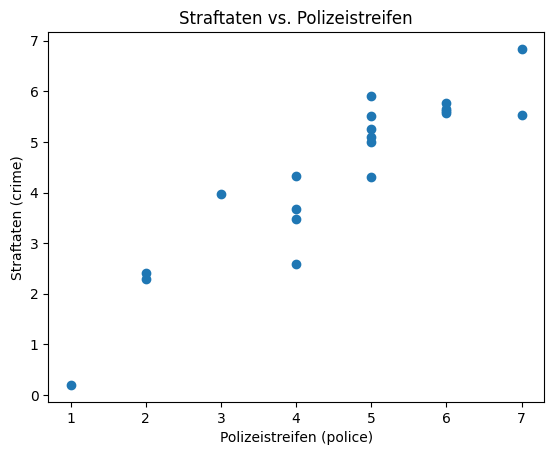

In [29]:
# Aufgabe 2: Zeigen Sie die Polizeistreifen und die Straftaten in einem Streudiagramm an.
plt.scatter(df["Polizeistreifen"], df["Straftaten"])
plt.xlabel("Polizeistreifen (police)")
plt.ylabel("Straftaten (crime)")
plt.title("Straftaten vs. Polizeistreifen")

Wir wollen hier die Anzahl Polizeistreifen nutzen, um die Anzahl Straftaten vorherzusagen. Welches sind die abhängige und unabhängige Variable in diesen Daten?

**Antwort**:
- ...
- ...

Erkennen Sie einen linearen Trend (= eine lineare Tendenz) in diesen Daten?

**Antwort**:

In [30]:
# Finden Sie eine optimale Regressionslinie für die Daten 
lm = smf.ols(formula="Polizeistreifen ~ Straftaten", data=df).fit()

steigung = lm.params["Straftaten"]
achsenabschnitt = lm.params["Intercept"]

print("Steigung:", steigung, "Achsenabschnitt:", achsenabschnitt)

Steigung: 0.9294160034911453 Achsenabschnitt: 0.46421478385596066


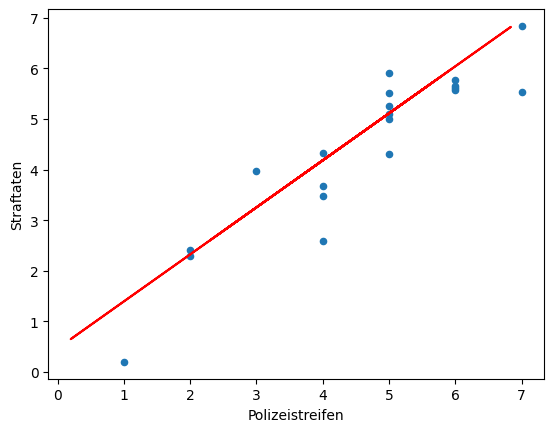

In [31]:
# Zeichnen Sie die Regressionslinie in das Streudiagramm ein
df.plot.scatter(x="Polizeistreifen", y="Straftaten")
x = df["Straftaten"]
y = steigung * x + achsenabschnitt
plt.plot(x, y, color="red", label="Regressionslinie")


Sagen Sie voraus, wie viele Strattaten entdeckt werden bei 6 Polizeikontrollen.

In [32]:
# Vorhersage der Straftaten bei 6 Polizeikontrollen

polizeikontrollen = 6
vorhergesagte_straftaten = steigung * polizeikontrollen + achsenabschnitt
print(f"Vorhergesagte Straftaten bei {polizeikontrollen} Polizeikontrollen: {vorhergesagte_straftaten}")


Vorhergesagte Straftaten bei 6 Polizeikontrollen: 6.040710804802832


## Aufgabe 2: CO₂-Ausstoss von Autos vorhersagen

Wenn man für die lineare Regression zwei oder mehr unabhängige Variablen verwendet, spricht man von **multipler linearer Regression**. Bei $n$ verschiedenen unabhängigen Varialben $x_1, x_2, \ldots, x_n$ wird zur Modellierung eine lineare Funktion vom Typ $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$ verwendet. Statt einer Geraden repräsentiert sie eine *Ebene* in einem mehrdimensioanlen Raum (=Hyperebene).

Der 

## Aufgabe 2: CO₂-Ausstoss von Autos vorhersagen

Für diese Aufgabe analysieren wir den Datensatz über [Autos und CO₂-Ausstoss von W3Schools](https://www.w3schools.com/python/python_ml_multiple_regression.asp). Über die unabhängigen Variablen `Weight` (=Gewicht) und `Volume` (=Volume) soll der CO₂-Ausstoss `CO2` (abhängige Variable) vorhergesagt werden.

Wenn man für die lineare Regression zwei oder mehr unabhängige Variablen verwendet, spricht man von **multipler linearer Regression**. Bei $n$ verschiedenen unabhängigen Varialben $x_1, x_2, \ldots, x_n$ wird zur Modellierung eine lineare Funktion vom Typ $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$ verwendet. Statt einer Geraden repräsentiert sie eine *Ebene* in einem mehrdimensioanlen Raum (=Hyperebene).

Der Datensatz `Data/cars-co2.csv` enthält Informationen über verschiedene Autos, darunter den CO₂-Ausstoss (in g/km) und verschiedene Merkmale wie Markennamen, Gewicht und Volumen. Ziel ist es, den CO₂-Ausstoss anhand dieser Merkmale vorherzusagen.

**a)** Laden Sie den Datensatz `Data/cars-co2.csv` in einen DataFrame und zeigen Sie die ersten 5 Zeilen an.`

In [33]:
df_cars = pd.read_csv("Data/cars-co2.csv")
df_cars.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


**b)** überprüfen Sie für jede unabhängige Variable separat, ob sie in einem linearen Zusammenhang zur abhängigen Variable `CO2` steht.

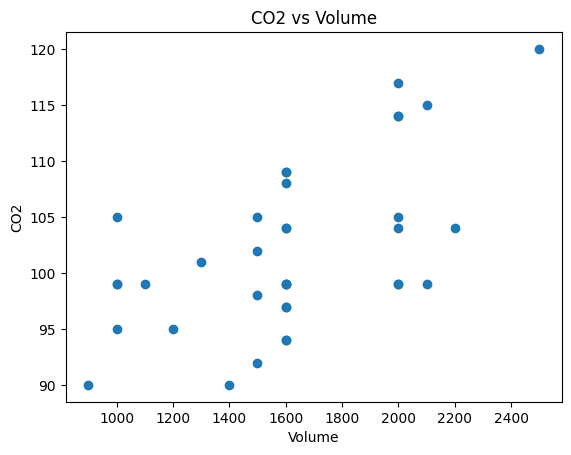

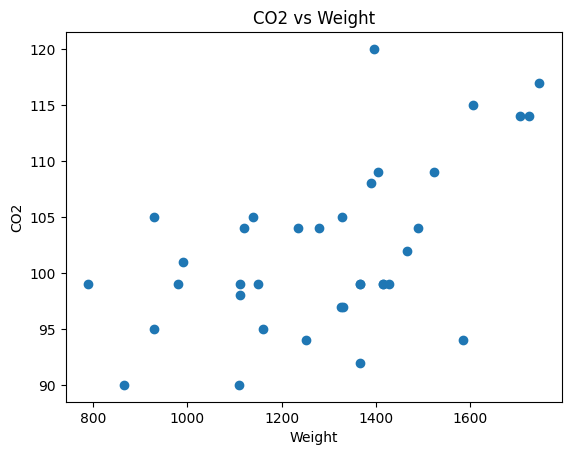

In [34]:
independent_variables = ['Volume', 'Weight']

for variable in independent_variables:
    plt.scatter(df_cars[variable], df_cars['CO2'])
    plt.xlabel(variable)
    plt.ylabel('CO2')
    plt.title(f'CO2 vs {variable}')
    plt.show()

**b)** Erstellen Sie mit Hilfe von statsmodels ein lineares Modell. Gibt es mehr als eine unabhängige Variable, werden sie im Schlüssel-Argument `formula` von `ols()` mit `+` verbunden, also `'CO2 ~ weight + volume'`.

In [37]:
# Erstellen eines linearen Modells mit statsmodels
lm_cars = smf.ols(formula="CO2 ~ Weight + Volume", data=df_cars).fit()

# Ausgabe der Zusammenfassung des Modells
print(lm_cars.params)

Intercept    79.694719
Weight        0.007551
Volume        0.007805
dtype: float64


In [38]:
df_cars

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


**c)** Wie viel CO2 wird bei einem Gewicht von 2000 und einem Volumen von 1000 emittiert?


In [40]:
gewicht = 2000
volumen = 1000
vorhergesagtes_co2 = lm_cars.params["Intercept"] + lm_cars.params["Weight"] * gewicht + lm_cars.params["Volume"] * volumen

<div class="alert alert-block alert-info">
<strong>Kontrollfragen</strong>

1. Was versteht man unter der *abhängigen* Variablen? 
2. Was versteht man unter *unabhängigen* Variablen?
3. Was ist der Unterschied zwischen der *einfachen* linearen Regression und der *multiplen* linearen Regression?
4. Weshalb muss man die *Linearität* der unabhängigen Variablen überprüfen? Und wie macht man das?
5. Wozu verwendet man die Programmbibliothek *pandas*?
6. Wozu verwendet man die Programmbibliothek *statsmodels*?
7. Was versteht man unter einem statistischen Modell?
</div>